#### Necessary Library

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns 
import pandas_profiling
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

#### Loading Data

In [2]:
train_data = pd.read_csv('train_data/train.csv')
test_data = pd.read_csv('test.csv')

#### Exploratory Data Analysis

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [4]:
train_data.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


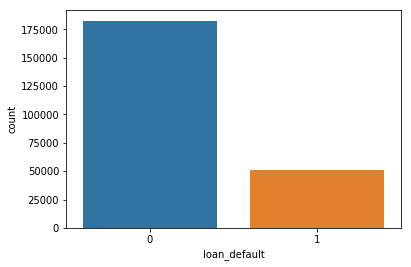

In [5]:
sns.countplot(train_data["loan_default"])

Data is unbalanced

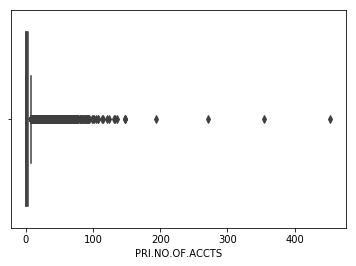

In [6]:
sns.boxplot(x=train_data["PRI.NO.OF.ACCTS"])

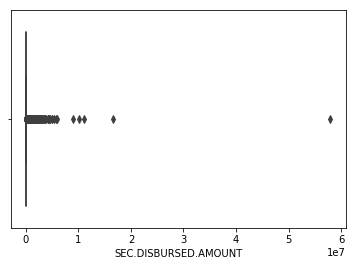

In [7]:
sns.boxplot(x="SEC.DISBURSED.AMOUNT",data=test_data)

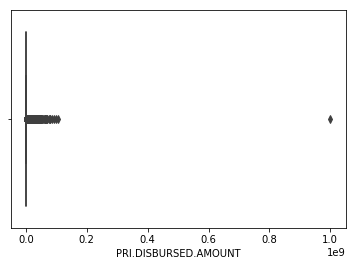

In [8]:
sns.boxplot(x="PRI.DISBURSED.AMOUNT", data=train_data)

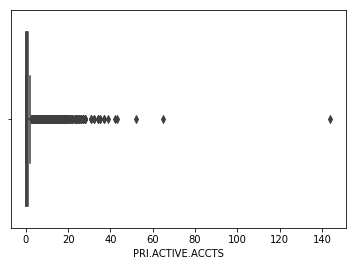

In [9]:
sns.boxplot(x=train_data["PRI.ACTIVE.ACCTS"])

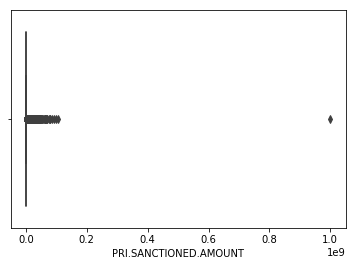

In [10]:
result['numberofadults','numberofchildren','total_pax']sns.boxplot(x=train_data['PRI.SANCTIONED.AMOUNT'])

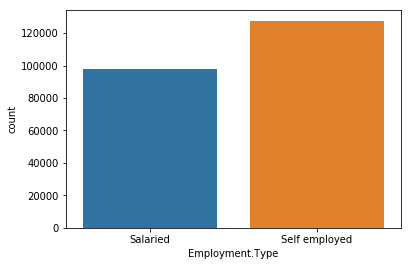

In [11]:
sns.countplot(train_data["Employment.Type"])

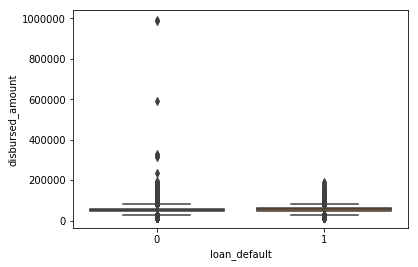

In [12]:
sns.boxplot(x="loan_default", y="disbursed_amount", data=train_data)

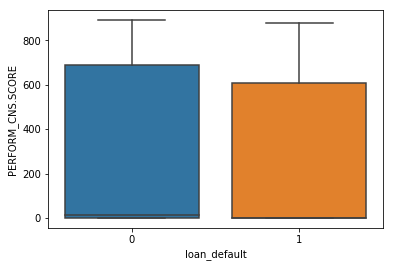

In [13]:
sns.boxplot(x="loan_default", y="PERFORM_CNS.SCORE", data=train_data)

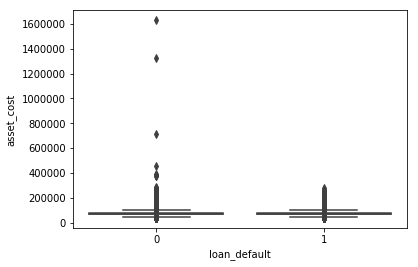

In [14]:
sns.boxplot(x="loan_default", y="asset_cost", data=train_data)

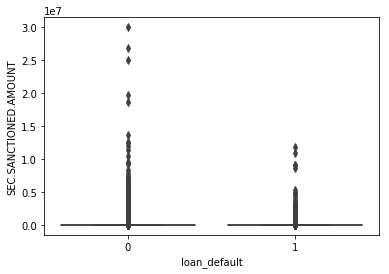

In [15]:
sns.boxplot(x="loan_default", y="SEC.SANCTIONED.AMOUNT", data=train_data)

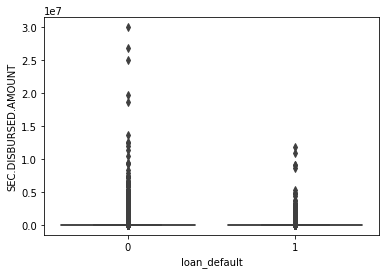

In [16]:
sns.boxplot(x="loan_default", y="SEC.DISBURSED.AMOUNT", data=train_data)

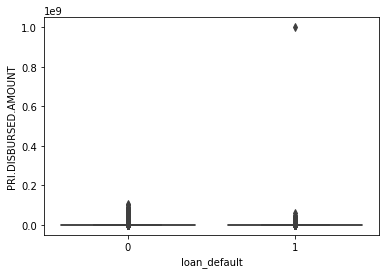

In [17]:
sns.boxplot(x="loan_default", y="PRI.DISBURSED.AMOUNT", data=train_data)

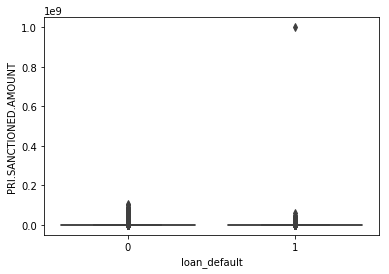

In [18]:
sns.boxplot(x="loan_default", y="PRI.SANCTIONED.AMOUNT", data=train_data)

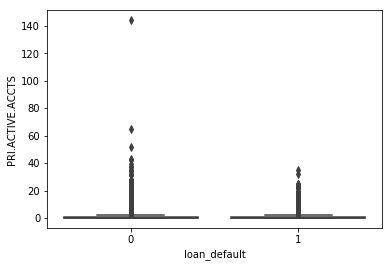

In [19]:
sns.boxplot(x="loan_default", y="PRI.ACTIVE.ACCTS", data=train_data)

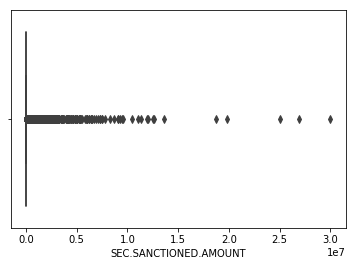

In [20]:
sns.boxplot(x="SEC.SANCTIONED.AMOUNT", data=train_data)

#### Dropping the outlier

In [21]:
outlier_index = train_data[(train_data['disbursed_amount'] > 600000) | (train_data['asset_cost'] > 600000) | (train_data['SEC.SANCTIONED.AMOUNT'] > 16000000) 
                            | (train_data['SEC.CURRENT.BALANCE'] > 17000000) | (train_data['SEC.DISBURSED.AMOUNT'] > 17000000) 
                            | (train_data['PRI.DISBURSED.AMOUNT'] >300000000) | (train_data['PRI.SANCTIONED.AMOUNT'] > 300000000)
                            | (train_data['PRI.ACTIVE.ACCTS'] > 80) | (train_data['SEC.ACTIVE.ACCTS'] > 30) 
                            | (train_data['PRI.CURRENT.BALANCE'] > 80000000) | (train_data['SEC.CURRENT.BALANCE'] > 2000000)
                            | (train_data['NEW.ACCTS.IN.LAST.SIX.MONTHS'] > 25)].index
train_data.drop(outlier_index,inplace = True)

#### Combining Train and Test

In [22]:
df=train_data.append(test_data,ignore_index=True)
df.tail()

/home/yash/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/pandas/core/frame.py:6701: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,AVERAGE.ACCT.AGE,Aadhar_flag,CREDIT.HISTORY.LENGTH,Current_pincode_ID,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,Date.of.Birth,DisbursalDate,Driving_flag,Employee_code_ID,Employment.Type,...,State_ID,UniqueID,VoterID_flag,asset_cost,branch_id,disbursed_amount,loan_default,ltv,manufacturer_id,supplier_id
345401,0yrs 0mon,1,0yrs 0mon,2591,0,14-05-92,28-11-18,0,3823,Self employed,...,4,755547,0,72509,74,44875,NaN,67.58,86,16646
345402,0yrs 0mon,1,0yrs 0mon,2593,0,24-04-84,19-11-18,0,3823,Self employed,...,4,716994,0,72509,74,53549,NaN,78.61,86,16646
345403,4yrs 10mon,1,9yrs 5mon,2593,0,01-01-86,17-11-18,0,3823,Self employed,...,4,709352,0,72509,74,55243,NaN,81.37,86,16646
345404,0yrs 3mon,1,0yrs 3mon,2593,1,01-01-73,15-11-18,0,3823,Self employed,...,4,699795,0,72509,74,55243,NaN,81.37,86,16646
345405,0yrs 0mon,1,0yrs 0mon,2593,0,01-01-74,28-11-18,0,3823,Self employed,...,4,755244,0,72509,74,40274,NaN,60.68,86,16646


In [ ]:
UniqueID_test = test_data['UniqueID']

#### Feature Engineering

In [23]:
def calculateage(v):
    return pd.to_datetime('today').year-pd.to_datetime(v).year               

df['age']=df['Date.of.Birth'].apply(calculateage)
df['acct_age']=df['AVERAGE.ACCT.AGE'].apply(lambda x: int(x.split(" ")[0][:-3])*12+int(x.split(" ")[1][:-3]))
df['credit_history_len']=df['CREDIT.HISTORY.LENGTH'].apply(lambda x: int(x.split(" ")[0][:-3])*12+int(x.split(" ")[1][:-3]))
df['credit_history_len_before_sixM']=df['credit_history_len'].apply(lambda x: x if x-6<0 else x-6)

df['Date.of.Birth']=pd.to_datetime(df['Date.of.Birth'])

df['dob_y']=df['Date.of.Birth'].dt.year
df['dob_m']=df['Date.of.Birth'].dt.month
df['dob_w']=df['Date.of.Birth'].dt.week
df['DisbursalDate']=pd.to_datetime(df['DisbursalDate'])

df['disb_m']=df['DisbursalDate'].dt.month
df['disb_w']=df['DisbursalDate'].dt.week
df['Employment.Type'].fillna('Other',inplace=True)


df['PERFORM_CNS.SCORE.BINS']=pd.cut(df['PERFORM_CNS.SCORE'],5,labels=['Slim','Doubtful','Fair','Good','Great']).astype(np.object)
df['ltv.BINS']=pd.cut(df['ltv'],3,labels=['Low','Medium','High']).astype(np.object)

df['PERFORM_CNS.SCORE.DESCRIPTION'].replace({'C-Very Low Risk':'Very Low Risk','A-Very Low Risk':'Very Low Risk','D-Very Low Risk':'Very Low Risk','B-Very Low Risk':'Very Low Risk',
'M-Very High Risk':'Very High Risk','L-Very High Risk':'Very High Risk',
                                               'F-Low Risk':'Low Risk','E-Low Risk':'Low Risk',
                                               'H-Medium Risk':'Medium Risk','I-Medium Risk':'Medium Risk',
                                               'J-High Risk':'High Risk','K-High Risk':'High Risk'},inplace=True)

df['Not_Scored']=np.where(df['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Not Scored'),1,0)
df['Very_Low']=np.where(df['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Very Low'),1,0)
df['Very_High']=np.where(df['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('Very High'),1,0)
df['No_History']=np.where(df['PERFORM_CNS.SCORE.DESCRIPTION'].str.contains('No Bureau'),1,0)

df['ACTIVE.ACCTS']=df['PRI.ACTIVE.ACCTS']+df['SEC.ACTIVE.ACCTS']
df['CURRENT.BALANCE']=df['PRI.CURRENT.BALANCE']+df['SEC.CURRENT.BALANCE']
df['DISBURSED.AMOUNT']=df['PRI.DISBURSED.AMOUNT']+df['SEC.DISBURSED.AMOUNT']
df['NO.OF.ACCTS']=df['SEC.NO.OF.ACCTS']+df['PRI.NO.OF.ACCTS']
df['OVERDUE.ACCTS']=df['PRI.OVERDUE.ACCTS']+df['SEC.OVERDUE.ACCTS']
df['SANCTIONED.AMOUNT']=df['PRI.SANCTIONED.AMOUNT']+df['SEC.SANCTIONED.AMOUNT']
df['INSTAL.AMT']=df['PRIMARY.INSTAL.AMT']+df['SEC.INSTAL.AMT']

df['SANCTION_DISBURSED']=df['SANCTIONED.AMOUNT']-df['DISBURSED.AMOUNT']

df['NO_DEACTIVE_ACCOUNTS']=df['NO.OF.ACCTS']-df['ACTIVE.ACCTS']
df['NO.OF.ACC.BEF.SIX.MONTH']=df['NO.OF.ACCTS']-df['NEW.ACCTS.IN.LAST.SIX.MONTHS']
df['OVERDUE.ACC.BEF.SIX.MONTHS']=df['OVERDUE.ACCTS']-df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']
df['CLEAN.ACC']=df['NO.OF.ACCTS']-(df['ACTIVE.ACCTS']+df['OVERDUE.ACCTS'])


df['asset_value']=df['disbursed_amount']*(df['ltv']/100)
df['value_cost']=df['asset_cost']-df['asset_value']
df['value_per_cost']=df['value_cost']/df['asset_value']
df['extra_finance']=df['asset_cost']*(df['ltv']/100)-df['disbursed_amount']
df['asset_disburse']=(df['asset_cost']-df['disbursed_amount'])/df['disbursed_amount']
df['sixmmonths_dfault']=df['NEW.ACCTS.IN.LAST.SIX.MONTHS']-df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']

df['Current_pincode_ID']=df['Current_pincode_ID'].astype(np.object)
df['Employee_code_ID']=df['Employee_code_ID'].astype(np.object)
df['State_ID']=df['State_ID'].astype(np.object)
df['branch_id']=df['branch_id'].astype(np.object)
df['manufacturer_id']=df['manufacturer_id'].astype(np.object)
df['supplier_id']=df['supplier_id'].astype(np.object)


for i in [ 'Aadhar_flag', 'Driving_flag', 'PAN_flag', 'Passport_flag', 'VoterID_flag']:
    df[i]=df[i].astype(np.object)
df['AVERAGE.ACCT.AGE.YEAR']=df['AVERAGE.ACCT.AGE'].apply(lambda x: int(x.split(" ")[0][:-3]))
df['AVERAGE.ACCT.AGE.MONTH']=df['AVERAGE.ACCT.AGE'].apply(lambda x: int(x.split(" ")[1][:-3]))

df['CREDIT.HISTORY.LENGTH.YEAR']=df['CREDIT.HISTORY.LENGTH'].apply(lambda x: int(x.split(" ")[0][:-3]))
df['CREDIT.HISTORY.LENGTH.MONTH']=df['CREDIT.HISTORY.LENGTH'].apply(lambda x: int(x.split(" ")[1][:-3]))

AVERAGE_ACCT_AGE = (df['AVERAGE.ACCT.AGE'].str.extractall(r'(\d+)')[0]
.unstack()
.astype(int)
.set_axis(['yr', 'mon'], axis=1, inplace=False)
.eval('yr + mon / 12'))
df['AVERAGE.ACCT.AGE'] = AVERAGE_ACCT_AGE

CREDIT_HISTORY_LENGTH = (df['CREDIT.HISTORY.LENGTH'].str.extractall(r'(\d+)')[0]
.unstack()
.astype(int)
.set_axis(['yr', 'mon'], axis=1, inplace=False)
.eval('yr + mon / 12'))
df['CREDIT.HISTORY.LENGTH'] = CREDIT_HISTORY_LENGTH

df['Total_Flag']=df['Driving_flag']+df['Aadhar_flag']+df['PAN_flag']+df['Passport_flag']+df['VoterID_flag']
df['Branch_Emp_code']=(df['Employee_code_ID']+df['branch_id']).astype(np.object)
df['Pin_Emp_code']=(df['Employee_code_ID']+df['Current_pincode_ID']).astype(np.object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345406 entries, 0 to 345405
Data columns (total 81 columns):
AVERAGE.ACCT.AGE                       345406 non-null float64
Aadhar_flag                            345406 non-null object
CREDIT.HISTORY.LENGTH                  345406 non-null float64
Current_pincode_ID                     345406 non-null object
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    345406 non-null int64
Date.of.Birth                          345406 non-null datetime64[ns]
DisbursalDate                          345406 non-null datetime64[ns]
Driving_flag                           345406 non-null object
Employee_code_ID                       345406 non-null object
Employment.Type                        345406 non-null object
MobileNo_Avl_Flag                      345406 non-null int64
NEW.ACCTS.IN.LAST.SIX.MONTHS           345406 non-null int64
NO.OF_INQUIRIES                        345406 non-null int64
PAN_flag                               345406 non-null object
PERFORM

In [24]:
df.drop(['Date.of.Birth','DisbursalDate','UniqueID','MobileNo_Avl_Flag'],axis=1,inplace=True)

In [25]:
train_data = df[df['loan_default'].isnull()!=True]
test_data = df[df['loan_default'].isnull()==True]
train_data.head()

,AVERAGE.ACCT.AGE,Aadhar_flag,CREDIT.HISTORY.LENGTH,Current_pincode_ID,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,Driving_flag,Employee_code_ID,Employment.Type,NEW.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,...,extra_finance,asset_disburse,sixmmonths_dfault,AVERAGE.ACCT.AGE.YEAR,AVERAGE.ACCT.AGE.MONTH,CREDIT.HISTORY.LENGTH.YEAR,CREDIT.HISTORY.LENGTH.MONTH,Total_Flag,Branch_Emp_code,Pin_Emp_code
0,0.000000,1,0.000000,1441,0,0,1998,Salaried,0,0,...,1719.2000,0.154652,0,0,0,0,0,1,2065,3439
1,1.916667,1,1.916667,1502,1,0,1998,Self employed,0,0,...,857.2650,0.390391,-1,1,11,1,11,1,2065,3500
2,0.000000,1,0.000000,1497,0,0,1998,Self employed,0,0,...,1718.9680,0.151695,0,0,0,0,0,1,2065,3495
3,0.666667,1,1.250000,1501,0,0,1998,Self employed,0,1,...,983.7824,0.149531,0,0,8,1,3,1,2065,3499
4,0.000000,1,0.000000,1495,0,0,1998,Self employed,0,1,...,921.1700,0.151247,0,0,0,0,0,1,2065,3493


In [26]:
X,Y = train_data.drop('loan_default',axis=1),train_data['loan_default']
test_data.drop('loan_default',axis=1,inplace = True)

/home/yash/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [43]:
categorical_features_indices = np.where(X.dtypes =='object')[0]
categorical_features_indices

array([ 1,  3,  5,  6,  7, 10, 12, 20, 28, 29, 31, 34, 35, 45, 46, 73, 74,
       75])

In [50]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    random_seed=63,
    iterations=3000,
    learning_rate=0.001,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    od_type='Iter',
    od_wait=20,
    subsample=0.5,
    eval_metric='AUC',
    one_hot_max_size=20,
    rsm=0.5,
    max_depth=6,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1,
    border_count=32,
    use_best_model=True)

In [55]:
errcb=[]
y_pred_test=[]

fold=StratifiedKFold(n_splits=20,shuffle=True,random_state=1994)

for train_index, test_index in fold.split(X,Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model.fit(X_train,y_train,cat_features = categorical_features_indices,eval_set = (X_test, y_test),early_stopping_rounds=500,verbose=100)
    preds=model.predict_proba(X_test)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    errcb.append(roc_auc_score(y_test,preds))
    p = model.predict_proba(test_data)[:,-1]
    y_pred_test.append(p)

0:	test: 0.5616299	best: 0.5616299 (0)	total: 37.5ms	remaining: 1m 52s
100:	test: 0.6343075	best: 0.6343075 (100)	total: 3.38s	remaining: 1m 37s
200:	test: 0.6494009	best: 0.6494009 (200)	total: 6.72s	remaining: 1m 33s
300:	test: 0.6575481	best: 0.6575481 (300)	total: 10s	remaining: 1m 30s
400:	test: 0.6608790	best: 0.6608790 (400)	total: 13.4s	remaining: 1m 26s
500:	test: 0.6629602	best: 0.6629602 (500)	total: 16.9s	remaining: 1m 24s
600:	test: 0.6641783	best: 0.6641783 (600)	total: 20.3s	remaining: 1m 21s
700:	test: 0.6652582	best: 0.6652582 (700)	total: 23.8s	remaining: 1m 17s
800:	test: 0.6659022	best: 0.6659022 (800)	total: 27.3s	remaining: 1m 15s
900:	test: 0.6664929	best: 0.6665091 (896)	total: 30.9s	remaining: 1m 12s
1000:	test: 0.6669184	best: 0.6669275 (996)	total: 34.5s	remaining: 1m 8s
1100:	test: 0.6673072	best: 0.6673103 (1097)	total: 38.2s	remaining: 1m 5s
1200:	test: 0.6677008	best: 0.6677008 (1200)	total: 42s	remaining: 1m 2s
1300:	test: 0.6681941	best: 0.6681941 (1300

In [56]:
# final 20 folds CV with tuning
np.mean(errcb)

0.6977777724530304

In [ ]:
submission = pd.DataFrame({'UniqueID':UniqueID_test,'loan_default':np.mean(y_pred_totcb,0)})
submission = submission[['UniqueID','loan_default']]
submission.head()

In [ ]:
submission.to_csv('submission_ver1.csv',index=False)